In [82]:
import pandas as pd
import numpy as np
from collections import defaultdict
import difflib

### 
# Data Sources
# Projects Data 
# webpage: https://datacatalog.worldbank.org/dataset/world-bank-projects-operations
# csv URL: http://search.worldbank.org/api/projects/all.csv
#
# Indicator Data
# webpage: https://data.worldbank.org/indicator
# GDP: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?view=chart
# GDP per Capita: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart
# Employment in Agriculture: https://data.worldbank.org/indicator/SL.AGR.EMPL.ZS
# 

df = pd.read_csv('data/projects_api.csv', dtype=str)

In [83]:
df.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P160543,East Asia and Pacific,Socialist Republic of Vietnam;Socialist Republ...,RE,Investment Project Financing,IN,C,N,L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P160504,East Asia and Pacific,Republic of Palau;Republic of Palau,RE,Investment Project Financing,IN,C,N,L,NaN,...,NaN,NaN,NaN,0004037892!$!State of Koror!$!7.3390002!$!134....,0004037892,State of Koror,7.3390002,134.4785,PW,NaN
2,P165684,South Asia,Islamic Republic of Pakistan;Islamic Republic ...,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P156837,Europe and Central Asia,Republic of Serbia;Republic of Serbia,PE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P160792,South Asia,Nepal;Nepal,PE,Development Policy Lending,AD,NaN,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df.shape

(18086, 57)

# Getting Ride of Missing Values

In [85]:
missing_count = df.isnull().sum(axis=0)

In [86]:
# Look at unique values for each column

for column in df:
    print(column, 'missing values: ', missing_count[column])
    print(df[column].unique())
    print('\n')

id missing values:  0
['P160543' 'P160504' 'P165684' ... 'P037362' 'P037452' 'P037383']


regionname missing values:  0
['East Asia and Pacific' 'South Asia' 'Europe and Central Asia'
 'Latin America and Caribbean' 'Africa' 'Middle East and North Africa'
 'Other']


countryname missing values:  0
['Socialist Republic of Vietnam;Socialist Republic of Vietnam'
 'Republic of Palau;Republic of Palau'
 'Islamic Republic of Pakistan;Islamic Republic of Pakistan'
 'Republic of Serbia;Republic of Serbia' 'Nepal;Nepal'
 'Republic of Peru;Republic of Peru'
 'Republic of Guinea;Republic of Guinea'
 'Republic of India;Republic of India'
 'Republic of Panama;Republic of Panama'
 'Lebanese Republic;Lebanese Republic'
 'Republic of Nicaragua;Republic of Nicaragua'
 'Argentine Republic;Argentine Republic'
 'Federal Democratic Republic of Ethiopia;Federal Democratic Republic of Ethiopia'
 'Central African Republic;Central African Republic'
 'Republic of Belarus;Republic of Belarus' 'Jamaica;Jamaica'
 '

In [180]:
# Note that 'theme ' has an extra space in its value

df_drop = df.drop(['Unnamed: 56', 'Country', 'Longitude','Latitude', 'GeoLocName', 'GeoLocID', 'location', 'mjtheme5name', 'mjtheme4name', 'mjtheme3name',
                  'mjtheme2name', 'mjtheme1name', 'goal', 'financier', 'theme ', 'theme5', 'theme4', 'theme3', 'theme2',
                  'mjsector5', 'mjsector4', 'mjsector3', 'mjsector2', 'mjsector1', 'sector5', 'sector4', 
                  'sector3', 'sector2', 'majorsector_percent ', 'projectdoc ', 'impagency', 'borrower', 'envassesmentcategorycode'], axis=1)

In [181]:
df_drop.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
0,P160543,East Asia and Pacific,Socialist Republic of Vietnam;Socialist Republ...,RE,Investment Project Financing,IN,N,L,NaN,NaN,...,"3,000,000",0,0,0,"3,000,000",http://projects.worldbank.org/P160543?lang=en,!$!0,NaN,NaN,Education for the knowledge economy!$!30!$!66
1,P160504,East Asia and Pacific,Republic of Palau;Republic of Palau,RE,Investment Project Financing,IN,N,L,NaN,NaN,...,"1,550,000",0,0,0,"1,100,000",http://projects.worldbank.org/P160504?lang=en,!$!0,NaN,NaN,Micro; Small and Medium Enterprise support!$!2...
2,P165684,South Asia,Islamic Republic of Pakistan;Islamic Republic ...,RE,Investment Project Financing,IN,N,L,Active,Active,...,"2,200,000",0,0,0,"2,000,000",http://projects.worldbank.org/P165684?lang=en,!$!0,NaN,NaN,!$!0
3,P156837,Europe and Central Asia,Republic of Serbia;Republic of Serbia,PE,Investment Project Financing,IN,N,L,Active,Active,...,"56,000,000","50,000,000",0,"50,000,000",0,http://projects.worldbank.org/P156837?lang=en,!$!0,NaN,NaN,!$!0
4,P160792,South Asia,Nepal;Nepal,PE,Development Policy Lending,AD,N,L,Active,Active,...,"200,000,000",0,"200,000,000","200,000,000",0,http://projects.worldbank.org/P160792?lang=en,!$!0,NaN,NaN,Decentralization!$!10!$!26


In [182]:
df_drop.isnull().sum()

id                         0
regionname                 0
countryname                0
prodline                   0
lendinginstr             245
lendinginstrtype         245
supplementprojectflg      31
productlinetype            0
projectstatusdisplay      10
status                    10
project_name               0
boardapprovaldate       1541
board_approval_month    1541
closingdate             3339
lendprojectcost          123
ibrdcommamt                0
idacommamt                 0
totalamt                   0
grantamt                   0
url                        0
sector1                    0
sector                   681
mjsector                 681
theme1                     0
dtype: int64

# Look at the Lending Project Costs

In [183]:
# Converting lending project cost into a numeric value
df_drop.lendprojectcost = pd.to_numeric(df.lendprojectcost.str.replace(',',''))

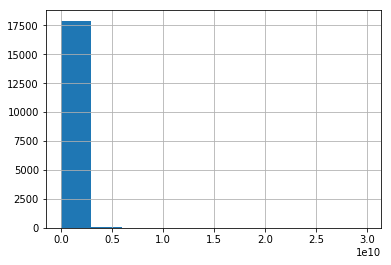

In [184]:
df_drop['lendprojectcost'].hist()

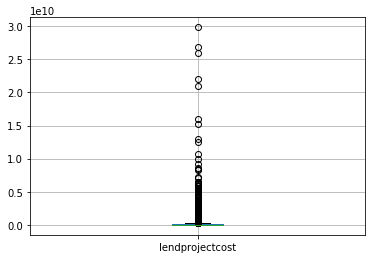

In [185]:
df_drop.boxplot('lendprojectcost')

In [186]:
df_drop.lendprojectcost.describe()

count    1.796300e+04
mean     1.234196e+08
std      5.942136e+08
min      0.000000e+00
25%      9.000000e+06
50%      3.000000e+07
75%      9.605000e+07
max      2.983330e+10
Name: lendprojectcost, dtype: float64

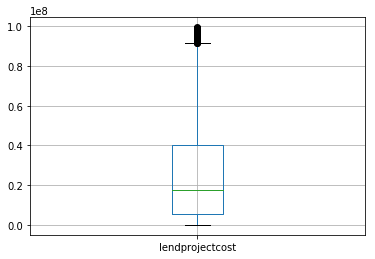

In [187]:
df_drop[df_drop.lendprojectcost < 1*10**8].boxplot()

In [188]:
# projects that have zero for project cost
df_drop[df_drop.lendprojectcost == 0]

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
939,P151031,Africa,Republic of South Sudan;Republic of South Sudan,RE,Investment Project Financing,IN,Y,L,Active,Active,...,0.0,0,0,0,0,http://projects.worldbank.org/P151031?lang=en,Crops!$!50!$!AH,Crops;Crops;Fisheries;Livestock,Agriculture; Fishing and Forestry;Agriculture;...,Nutrition and food security!$!70!$!68
1456,P128405,Europe and Central Asia,Ukraine;Ukraine,RE,Technical Assistance Loan,IN,N,L,Closed,Closed,...,0.0,0,0,0,0,http://projects.worldbank.org/P128405?lang=en,Oil and Gas!$!100!$!LC,Oil and Gas;Oil and Gas,Energy and Extractives;Energy and Extractives,Other public sector governance!$!100!$!30
1566,P126997,Europe and Central Asia,Republic of Tajikistan;Republic of Tajikistan,RE,Investment Project Financing,IN,N,L,Closed,Closed,...,0.0,0,0,0,0,http://projects.worldbank.org/P126997?lang=en,Mining!$!100!$!LM,Mining;Mining,Energy and Extractives;Energy and Extractives,Other public sector governance!$!100!$!30
1828,P151740,Africa,Burkina Faso;Burkina Faso,RE,Investment Project Financing,IN,N,L,Closed,Closed,...,0.0,0,0,0,0,http://projects.worldbank.org/P151740?lang=en,Other Information and Communications Technolog...,Other Information and Communications Technolog...,Information and Communications Technologies;In...,Other economic management!$!60!$!24
1992,P145339,Africa,Republic of South Sudan;Republic of South Sudan,RE,Specific Investment Loan,IN,Y,L,Active,Active,...,0.0,0,0,0,0,http://projects.worldbank.org/P145339?lang=en,Crops!$!35!$!AH,Crops;Crops;Agricultural Extension; Research; ...,Agriculture; Fishing and Forestry;Agriculture;...,Global food crisis response!$!100!$!91
2289,P132756,Latin America and Caribbean,Republic of Haiti;Republic of Haiti,RE,Specific Investment Loan,IN,Y,L,Active,Active,...,0.0,0,0,0,0,http://projects.worldbank.org/P132756?lang=en,Primary Education!$!100!$!EP,Primary Education;Primary Education,Education;Education,Education for all!$!82!$!65
2502,P129774,Middle East and North Africa,Kingdom of Morocco;Kingdom of Morocco,GE,Investment Project Financing,IN,N,L,Active,Active,...,0.0,0,0,0,0,http://projects.worldbank.org/P129774/morocco-...,Agricultural Extension; Research; and Other Su...,Agricultural Extension; Research; and Other Su...,Agriculture; Fishing and Forestry;Agriculture;...,Gender!$!10!$!59
2782,P130396,Africa,Republic of South Sudan;Republic of South Sudan,RE,Emergency Recovery Loan,IN,Y,L,Closed,Closed,...,0.0,0,0,0,0,http://projects.worldbank.org/P130396/southern...,Crops!$!50!$!AH,Crops;Crops;Social Protection;Other Agricultur...,Agriculture; Fishing and Forestry;Agriculture;...,Global food crisis response!$!100!$!91
3121,P101274,South Asia,Republic of India;Republic of India,CN,NaN,NaN,Y,L,Closed,Closed,...,0.0,0,0,0,0,http://projects.worldbank.org/P101274/rampur-h...,Other Energy and Extractives!$!48!$!LZ,Other Energy and Extractives;Other Energy and ...,Energy and Extractives;Energy and Extractives;...,Infrastructure services for private sector dev...
3420,P124785,Africa,Republic of Rwanda;Republic of Rwanda,RE,Specific Investment Loan,IN,Y,L,Active,Active,...,0.0,0,0,0,0,http://projects.worldbank.org/P124785/rwanda-l...,Irrigation and Drainage!$!44!$!AI,Irrigation and Drainage;Irrigation and Drainag...,Agriculture; Fishing and Forestry;Agriculture;...,Rural services and infrastructure!$!60!$!78


In [189]:
df_drop[df_drop.lendprojectcost == 0][['id', 'regionname', 'countryname', 'lendprojectcost', 'totalamt', 'lendinginstr', 'lendinginstrtype', 'boardapprovaldate', 'closingdate']]

,id,regionname,countryname,lendprojectcost,totalamt,lendinginstr,lendinginstrtype,boardapprovaldate,closingdate
939,P151031,Africa,Republic of South Sudan;Republic of South Sudan,0.0,0,Investment Project Financing,IN,2016-04-12T00:00:00Z,NaN
1456,P128405,Europe and Central Asia,Ukraine;Ukraine,0.0,0,Technical Assistance Loan,IN,2015-03-03T00:00:00Z,2015-12-31T00:00:00Z
1566,P126997,Europe and Central Asia,Republic of Tajikistan;Republic of Tajikistan,0.0,0,Investment Project Financing,IN,2014-11-19T00:00:00Z,2017-10-31T00:00:00Z
1828,P151740,Africa,Burkina Faso;Burkina Faso,0.0,0,Investment Project Financing,IN,2014-05-27T00:00:00Z,2016-07-31T00:00:00Z
1992,P145339,Africa,Republic of South Sudan;Republic of South Sudan,0.0,0,Specific Investment Loan,IN,2014-03-13T00:00:00Z,NaN
2289,P132756,Latin America and Caribbean,Republic of Haiti;Republic of Haiti,0.0,0,Specific Investment Loan,IN,2013-06-29T00:00:00Z,NaN
2502,P129774,Middle East and North Africa,Kingdom of Morocco;Kingdom of Morocco,0.0,0,Investment Project Financing,IN,2013-03-12T00:00:00Z,2018-12-31T00:00:00Z
2782,P130396,Africa,Republic of South Sudan;Republic of South Sudan,0.0,0,Emergency Recovery Loan,IN,2012-06-15T00:00:00Z,NaN
3121,P101274,South Asia,Republic of India;Republic of India,0.0,0,NaN,NaN,2011-10-06T00:00:00Z,2017-02-27T00:00:00Z
3420,P124785,Africa,Republic of Rwanda;Republic of Rwanda,0.0,0,Specific Investment Loan,IN,2011-04-09T00:00:00Z,2015-12-31T00:00:00Z


In [190]:
df_drop[df_drop.lendprojectcost.isnull()][['id', 'regionname', 'countryname', 'lendprojectcost', 'totalamt', 'lendinginstr', 'lendinginstrtype', 'boardapprovaldate', 'closingdate']]

,id,regionname,countryname,lendprojectcost,totalamt,lendinginstr,lendinginstrtype,boardapprovaldate,closingdate
78,P166205,Europe and Central Asia,Montenegro;Montenegro,NaN,"93,000,000",Development Policy Lending,AD,2017-12-20T00:00:00Z,NaN
159,P163582,Africa,Republic of Malawi;Republic of Malawi,NaN,0,Investment Project Financing,IN,2017-10-18T00:00:00Z,NaN
164,P158137,Africa,Africa;Africa,NaN,0,Investment Project Financing,IN,2017-09-29T00:00:00Z,NaN
314,P163720,Europe and Central Asia,Republic of Moldova;Republic of Moldova,NaN,0,Investment Project Financing,IN,2017-06-09T00:00:00Z,NaN
387,P157521,Africa,Republic of Zambia;Republic of Zambia,NaN,0,Investment Project Financing,IN,2017-05-04T00:00:00Z,NaN
468,P159562,Africa,Southern Africa;Southern Africa,NaN,0,Investment Project Financing,IN,2017-03-28T00:00:00Z,2023-09-29T00:00:00Z
486,P157909,Africa,Republic of Madagascar;Republic of Madagascar,NaN,0,Investment Project Financing,IN,2017-03-23T00:00:00Z,NaN
606,P157635,East Asia and Pacific,Pacific Islands;Pacific Islands,NaN,0,Investment Project Financing,IN,2017-01-05T00:00:00Z,NaN
698,P158033,South Asia,Republic of India;Republic of India,NaN,0,Investment Project Financing,IN,2016-11-04T00:00:00Z,NaN
740,P149522,Latin America and Caribbean,Belize;Belize,NaN,0,Investment Project Financing,IN,2016-09-12T00:00:00Z,2020-07-31T00:00:00Z


In [196]:
df_drop.fillna(df_drop.groupby('countryname')['lendprojectcost'].mean())

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
0,P160543,East Asia and Pacific,Socialist Republic of Vietnam;Socialist Republ...,RE,Investment Project Financing,IN,N,L,NaN,NaN,...,3.000000e+06,0,0,0,"3,000,000",http://projects.worldbank.org/P160543?lang=en,!$!0,NaN,NaN,Education for the knowledge economy!$!30!$!66
1,P160504,East Asia and Pacific,Republic of Palau;Republic of Palau,RE,Investment Project Financing,IN,N,L,NaN,NaN,...,1.550000e+06,0,0,0,"1,100,000",http://projects.worldbank.org/P160504?lang=en,!$!0,NaN,NaN,Micro; Small and Medium Enterprise support!$!2...
2,P165684,South Asia,Islamic Republic of Pakistan;Islamic Republic ...,RE,Investment Project Financing,IN,N,L,Active,Active,...,2.200000e+06,0,0,0,"2,000,000",http://projects.worldbank.org/P165684?lang=en,!$!0,NaN,NaN,!$!0
3,P156837,Europe and Central Asia,Republic of Serbia;Republic of Serbia,PE,Investment Project Financing,IN,N,L,Active,Active,...,5.600000e+07,"50,000,000",0,"50,000,000",0,http://projects.worldbank.org/P156837?lang=en,!$!0,NaN,NaN,!$!0
4,P160792,South Asia,Nepal;Nepal,PE,Development Policy Lending,AD,N,L,Active,Active,...,2.000000e+08,0,"200,000,000","200,000,000",0,http://projects.worldbank.org/P160792?lang=en,!$!0,NaN,NaN,Decentralization!$!10!$!26
5,P164660,Latin America and Caribbean,Republic of Peru;Republic of Peru,RE,Investment Project Financing,IN,N,L,Active,Active,...,4.000000e+05,0,0,0,"300,000",http://projects.worldbank.org/P164660?lang=en,!$!0,NaN,NaN,!$!0
6,P160771,Africa,Republic of Guinea;Republic of Guinea,PE,Investment Project Financing,IN,Y,L,Active,Active,...,2.500000e+07,0,"25,000,000","25,000,000",0,http://projects.worldbank.org/P160771?lang=en,Energy Transmission and Distribution!$!90!$!LT,Energy Transmission and Distribution;Energy Tr...,Energy and Extractives;Energy and Extractives;...,!$!0
7,P157054,South Asia,Republic of India;Republic of India,PE,Investment Project Financing,IN,N,L,Active,Active,...,5.020000e+08,"210,000,000",0,"210,000,000",0,http://projects.worldbank.org/P157054?lang=en,!$!0,NaN,NaN,Rural services and infrastructure!$!100!$!78
8,P157575,Latin America and Caribbean,Republic of Panama;Republic of Panama,PE,Investment Project Financing,IN,N,L,Active,Active,...,8.520000e+07,"80,000,000",0,"80,000,000",0,http://projects.worldbank.org/P157575?lang=en,!$!0,NaN,NaN,Indigenous peoples!$!40!$!60
9,P160224,Middle East and North Africa,Lebanese Republic;Lebanese Republic,PE,Investment Project Financing,IN,N,L,Active,Active,...,3.450000e+08,"225,200,000",0,"225,200,000",0,http://projects.worldbank.org/P160224?lang=en,Urban Transport!$!100!$!TC,Urban Transport;Urban Transport,Transportation;Transportation,Infrastructure services for private sector dev...


In [192]:
df_drop[df_drop.lendprojectcost.isnull()]

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
314,P163720,Europe and Central Asia,Republic of Moldova;Republic of Moldova,GE,Investment Project Financing,IN,Y,L,Active,Active,...,NaN,0,0,0,"2,000,000",http://projects.worldbank.org/P163720?lang=en,Forestry!$!100!$!AT,Forestry;Forestry,Agriculture; Fishing and Forestry;Agriculture;...,!$!0
387,P157521,Africa,Republic of Zambia;Republic of Zambia,GE,Investment Project Financing,IN,Y,L,Active,Active,...,NaN,0,0,0,"8,050,000",http://projects.worldbank.org/P157521?lang=en,Forestry!$!67!$!AT,Forestry;Forestry;Agricultural Extension; Rese...,Agriculture; Fishing and Forestry;Agriculture;...,!$!0
468,P159562,Africa,Southern Africa;Southern Africa,GE,Investment Project Financing,IN,N,L,Active,Active,...,NaN,0,0,0,"6,420,000",http://projects.worldbank.org/P159562?lang=en,Fisheries!$!57!$!AF,Fisheries;Fisheries;Public Administration - Ag...,Agriculture; Fishing and Forestry;Agriculture;...,Environmental policies and institutions!$!34!$!82
486,P157909,Africa,Republic of Madagascar;Republic of Madagascar,GE,Investment Project Financing,IN,N,L,Active,Active,...,NaN,0,0,0,"13,700,000",http://projects.worldbank.org/P157909?lang=en,Other Agriculture; Fishing and Forestry!$!84!$!AZ,Other Agriculture; Fishing and Forestry;Other ...,Agriculture; Fishing and Forestry;Agriculture;...,Water resource management!$!30!$!85
606,P157635,East Asia and Pacific,Pacific Islands;Pacific Islands,RE,Investment Project Financing,IN,Y,L,Active,Active,...,NaN,0,0,0,"950,000",http://projects.worldbank.org/P157635?lang=en,Public Administration - Transportation!$!83!$!TF,Public Administration - Transportation;Public ...,Transportation;Transportation;Transportation;I...,Administrative and civil service reform!$!44!$!25
698,P158033,South Asia,Republic of India;Republic of India,GE,Investment Project Financing,IN,Y,L,Active,Active,...,NaN,0,0,0,"5,190,000",http://projects.worldbank.org/P158033?lang=en,Other Energy and Extractives!$!46!$!LZ,Other Energy and Extractives;Other Energy and ...,Energy and Extractives;Energy and Extractives;...,!$!0
740,P149522,Latin America and Caribbean,Belize;Belize,GE,Investment Project Financing,IN,N,L,Active,Active,...,NaN,0,0,0,"8,000,000",http://projects.worldbank.org/P149522?lang=en,Energy Transmission and Distribution!$!95!$!LT,Energy Transmission and Distribution;Energy Tr...,Energy and Extractives;Energy and Extractives;...,!$!0
743,P151281,East Asia and Pacific,People's Republic of China;People's Republic o...,GE,Investment Project Financing,IN,N,L,Active,Active,...,NaN,0,0,0,"8,000,000",http://projects.worldbank.org/P151281?lang=en,Central Government (Central Agencies)!$!60!$!BC,Central Government (Central Agencies);Central ...,Public Administration;Public Administration;Pu...,!$!0
746,P157249,Africa,Gabonese Republic;Gabonese Republic,GE,Investment Project Financing,IN,N,L,Active,Active,...,NaN,0,0,0,"9,060,000",http://projects.worldbank.org/P157249?lang=en,Public Administration - Agriculture; Fishing &...,Public Administration - Agriculture; Fishing &...,Agriculture; Fishing and Forestry;Agriculture;...,Biodiversity!$!100!$!80
805,P159307,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,RE,Investment Project Financing,IN,Y,L,Active,Active,...,NaN,0,0,0,"57,260,000",http://projects.worldbank.org/P159307?lang=en,Other Water Supply; Sanitation and Waste Manag...,Other Water Supply; Sanitation and Waste Manag...,Water; Sanitation and Waste Management;Water; ...,Other rural development!$!40!$!79


In [216]:
df_drop['lendprojectcost'] = df_drop['lendprojectcost'].fillna(df_drop.groupby(['countryname', 'lendinginstr'])['lendprojectcost'].transform('mean'))

In [217]:
df_drop['lendprojectcost'].isnull().sum()

2

In [218]:
df_drop['lendprojectcost'] = df_drop['lendprojectcost'].fillna(df_drop.groupby(['countryname'])['lendprojectcost'].transform('mean'))

In [219]:
df_drop['lendprojectcost'].isnull().sum()

0

# Look at Date

In [133]:
df_drop['boardapprovaldate']

0        2018-05-31T00:00:00Z
1        2018-03-30T00:00:00Z
2        2018-03-23T00:00:00Z
3        2018-03-20T00:00:00Z
4        2018-03-20T00:00:00Z
5        2018-03-20T00:00:00Z
6        2018-03-16T00:00:00Z
7        2018-03-15T00:00:00Z
8        2018-03-15T00:00:00Z
9        2018-03-15T00:00:00Z
10       2018-03-15T00:00:00Z
11       2018-03-15T00:00:00Z
12       2018-03-15T00:00:00Z
13       2018-03-15T00:00:00Z
14       2018-03-14T00:00:00Z
15       2018-03-13T00:00:00Z
16       2018-03-12T00:00:00Z
17       2018-03-12T00:00:00Z
18       2018-03-07T00:00:00Z
19       2018-03-05T00:00:00Z
20       2018-03-02T00:00:00Z
21       2018-03-01T00:00:00Z
22       2018-03-01T00:00:00Z
23       2018-03-01T00:00:00Z
24       2018-02-28T00:00:00Z
25       2018-02-28T00:00:00Z
26       2018-02-28T00:00:00Z
27       2018-02-27T00:00:00Z
28       2018-02-27T00:00:00Z
29       2018-02-27T00:00:00Z
                 ...         
18056    1950-09-13T00:00:00Z
18057    1950-08-25T00:00:00Z
18058    1

In [388]:
df_drop['boardapprovaldate'] = pd.to_datetime(df_drop['boardapprovaldate'])

In [389]:
df_drop['closingdate'] = pd.to_datetime(df_drop['closingdate'])

In [390]:
df_drop[df_drop['boardapprovaldate'].isnull()][['id', 'regionname', 'countryname', 'lendprojectcost', 'totalamt', 'lendinginstr', 'lendinginstrtype', 'boardapprovaldate', 'closingdate']]

,id,regionname,countryname,lendprojectcost,totalamt,lendinginstr,lendinginstrtype,boardapprovaldate,closingdate
15695,P000031,Africa,Republic of Angola,4.000000e+07,"40,000,000",Specific Investment Loan,IN,NaT,NaT
15696,P000095,Africa,Republic of Benin,0.000000e+00,0,NaN,NaN,NaT,NaT
15697,P000119,Africa,Republic of Benin,5.680000e+07,"30,000,000",Specific Investment Loan,IN,NaT,NaT
15698,P000412,Africa,Republic of Cameroon,3.000000e+07,"20,000,000",Specific Investment Loan,IN,NaT,NaT
15699,P000719,Africa,Federal Democratic Republic of Ethiopia,0.000000e+00,0,Specific Investment Loan,IN,NaT,NaT
15700,P001012,Africa,Republic of Guinea-Bissau,4.075000e+07,"20,000,000",Specific Investment Loan,IN,NaT,NaT
15701,P001158,Africa,Republic of Cote d'Ivoire,0.000000e+00,0,Specific Investment Loan,IN,NaT,NaT
15702,P001316,Africa,Republic of Kenya,0.000000e+00,0,Specific Investment Loan,IN,NaT,NaT
15703,P001346,Africa,Republic of Kenya,3.760000e+08,"27,000,000",Specific Investment Loan,IN,NaT,NaT
15704,P001373,Africa,Republic of Kenya,4.000000e+07,"40,000,000",Specific Investment Loan,IN,NaT,NaT


In [391]:
df_drop['boardapprovaldate'] = df_drop['boardapprovaldate'].fillna(method='bfill')

In [392]:
df_drop['boardapprovaldate'].isnull().sum()

0

# Fixing Country Name

In [227]:
df_drop['countryname'].unique()

array(['Socialist Republic of Vietnam;Socialist Republic of Vietnam',
       'Republic of Palau;Republic of Palau',
       'Islamic Republic of Pakistan;Islamic Republic of Pakistan',
       'Republic of Serbia;Republic of Serbia', 'Nepal;Nepal',
       'Republic of Peru;Republic of Peru',
       'Republic of Guinea;Republic of Guinea',
       'Republic of India;Republic of India',
       'Republic of Panama;Republic of Panama',
       'Lebanese Republic;Lebanese Republic',
       'Republic of Nicaragua;Republic of Nicaragua',
       'Argentine Republic;Argentine Republic',
       'Federal Democratic Republic of Ethiopia;Federal Democratic Republic of Ethiopia',
       'Central African Republic;Central African Republic',
       'Republic of Belarus;Republic of Belarus', 'Jamaica;Jamaica',
       'Ukraine;Ukraine',
       'Democratic Republic of the Congo;Democratic Republic of the Congo',
       'Republic of Haiti;Republic of Haiti',
       'Republic of Mali;Republic of Mali',
       '

In [306]:
df_drop['countryname'] = df_drop['countryname'].str.split(';').apply(lambda x: x[0])

# Indicator Data

In [717]:
gdp = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', header=2)

In [718]:
indicator_countries = gdp['Country Name'].unique().tolist()

In [719]:
project_countries = df_drop['countryname'].unique().tolist()

In [720]:
indicator_dict = {key: None for key in indicator_countries}

In [721]:
for indicator_country in indicator_countries:
    for project_country in df_drop['countryname'].unique():
        if project_country.find(indicator_country) != -1:
            print(indicator_country, ', ', project_country, project_country.find(indicator_country))
            indicator_dict[indicator_country] = project_country

Afghanistan ,  Islamic  Republic of Afghanistan 21
Angola ,  Republic of Angola 12
Albania ,  Republic of Albania 12
Armenia ,  Republic of Armenia 12
American Samoa ,  American Samoa 0
Antigua and Barbuda ,  Antigua and Barbuda 0
Australia ,  Commonwealth of Australia 16
Austria ,  Republic of Austria 12
Azerbaijan ,  Republic of Azerbaijan 12
Burundi ,  Republic of Burundi 12
Belgium ,  Kingdom of Belgium 11
Benin ,  Republic of Benin 12
Burkina Faso ,  Burkina Faso 0
Bangladesh ,  People's Republic of Bangladesh 21
Bulgaria ,  Republic of Bulgaria 12
Bosnia and Herzegovina ,  Bosnia and Herzegovina 0
Belarus ,  Republic of Belarus 12
Belize ,  Belize 0
Bolivia ,  Plurinational State of Bolivia 23
Brazil ,  Federative Republic of Brazil 23
Barbados ,  Barbados 0
Bhutan ,  Kingdom of Bhutan 11
Botswana ,  Republic of Botswana 12
Central African Republic ,  Central African Republic 0
Chile ,  Republic of Chile 12
China ,  People's Republic of China 21
Cote d'Ivoire ,  Republic of Cote 

In [722]:
indicator_dict

{'Afghanistan': 'Islamic  Republic of Afghanistan',
 'Albania': 'Republic of Albania',
 'Algeria': "People's Democratic Republic of Algeria",
 'American Samoa': 'American Samoa',
 'Andorra': None,
 'Angola': 'Republic of Angola',
 'Antigua and Barbuda': 'Antigua and Barbuda',
 'Arab World': None,
 'Argentina': None,
 'Armenia': 'Republic of Armenia',
 'Aruba': None,
 'Australia': 'Commonwealth of Australia',
 'Austria': 'Republic of Austria',
 'Azerbaijan': 'Republic of Azerbaijan',
 'Bahamas, The': None,
 'Bahrain': None,
 'Bangladesh': "People's Republic of Bangladesh",
 'Barbados': 'Barbados',
 'Belarus': 'Republic of Belarus',
 'Belgium': 'Kingdom of Belgium',
 'Belize': 'Belize',
 'Benin': 'Republic of Benin',
 'Bermuda': None,
 'Bhutan': 'Kingdom of Bhutan',
 'Bolivia': 'Plurinational State of Bolivia',
 'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
 'Botswana': 'Republic of Botswana',
 'Brazil': 'Federative Republic of Brazil',
 'British Virgin Islands': None,
 'Brunei Dar

In [723]:
# indicator countries that were not found 
for key, value in indicator_dict.items():
    if value == None:
        print(key)

Aruba
Andorra
Arab World
United Arab Emirates
Argentina
Bahrain
Bahamas, The
Bermuda
Brunei Darussalam
Canada
Central Europe and the Baltics
Switzerland
Channel Islands
Congo, Dem. Rep.
Congo, Rep.
Caribbean small states
Cuba
Curacao
Cayman Islands
Germany
East Asia & Pacific (excluding high income)
Early-demographic dividend
East Asia & Pacific
Europe & Central Asia (excluding high income)
Europe & Central Asia
Egypt, Arab Rep.
Euro area
European Union
Fragile and conflict affected situations
France
Faroe Islands
Micronesia, Fed. Sts.
United Kingdom
Gibraltar
Gambia, The
Greece
Greenland
Guam
High income
Hong Kong SAR, China
Heavily indebted poor countries (HIPC)
IBRD only
IDA & IBRD total
IDA total
IDA blend
IDA only
Isle of Man
Not classified
Iran, Islamic Rep.
Italy
Korea, Rep.
Kuwait
Latin America & Caribbean (excluding high income)
Lao PDR
Lebanon
Latin America & Caribbean
Least developed countries: UN classification
Low income
Liechtenstein
Sri Lanka
Lower middle income
Low & mi

In [724]:
sorted(project_countries)

['Africa',
 'American Samoa',
 'Andean Countries',
 'Antigua and Barbuda',
 'Arab Republic of Egypt',
 'Aral Sea',
 'Argentine Republic',
 'Asia',
 'Barbados',
 'Belize',
 'Bosnia and Herzegovina',
 'Burkina Faso',
 'Caribbean',
 'Caucasus',
 'Central Africa',
 'Central African Republic',
 'Central America',
 'Central Asia',
 'Co-operative Republic of Guyana',
 'Commonwealth of Australia',
 'Commonwealth of Dominica',
 'Commonwealth of The Bahamas',
 'Czech Republic',
 'Democratic Republic of Sao Tome and Prin',
 'Democratic Republic of Timor-Leste',
 'Democratic Republic of the Congo',
 'Democratic Socialist Republic of Sri Lan',
 'Dominican Republic',
 'EU Accession Countries',
 'East Asia and Pacific',
 'Eastern Africa',
 'Europe and Central Asia',
 'Federal Democratic Republic of Ethiopia',
 'Federal Republic of Nigeria',
 'Federated States of Micronesia',
 'Federative Republic of Brazil',
 'French Republic',
 'Gabonese Republic',
 'Georgia',
 'Grand Duchy of Luxembourg',
 'Grenada

In [725]:
indicator_dict['Arab World'] = 'Middle East and North Africa'
indicator_dict['Argentina'] =  'Argentine Republic'
indicator_dict['Congo, Dem. Rep.'] = 'Democratic Republic of the Congo'
indicator_dict['Congo, Rep.'] = 'Republic of Congo'
indicator_dict['Egypt, Arab Rep.'] = 'Arab Republic of Egypt'
indicator_dict['Gambia, The'] = 'Republic of The Gambia'
indicator_dict['Iran, Islamic Rep.'] = 'Islamic Republic of Iran'
indicator_dict['Korea, Rep.'] = 'Republic of Korea'
indicator_dict['Lao PDR'] = "Lao People's Democratic Republic"
indicator_dict['Lebanon'] = 'Lebanese Republic'
indicator_dict['Sri Lanka'] = 'Democratic Socialist Republic of Sri Lan'
indicator_dict['Mexico'] = 'United Mexican States'
indicator_dict['Macedonia, FYR'] = 'Macedonia' # in project csv file, Macedonia had a ; in the name! point that out
indicator_dict['Sao Tome and Principe'] = 'Democratic Republic of Sao Tome and Prin'
indicator_dict['Venezuela, RB'] = 'Republica Bolivariana de Venezuela'
indicator_dict['Yemen, Rep.'] = 'Republic of Yemen'
indicator_dict['Guinea'] = 'Republic of Guinea'
indicator_dict['Somalia'] = 'Somali Democratic Republic'
indicator_dict['Samoa'] = 'Samoa'
indicator_dict['Papua New Guinea'] = 'The Independent State of Papua New Guine'
indicator_dict['Micronesia, Fed. Sts.'] = 'Federated States of Micronesia'
indicator_dict['Bahamas, The'] = 'Commonwealth of The Bahamas'
indicator_dict['Portugal'] = 'Portuguese Republic'
indicator_dict['Greece'] = 'Hellenic Republic'
indicator_dict['Italy'] = 'Italian Republic'
indicator_dict['France'] = 'French Republic'

In [726]:
project_dict = defaultdict(str)
for key, value in indicator_dict.items():
    if value != None and type(value) != list:
        project_dict[value] = key
    if value == None:
        project_dict[key] = key

In [727]:
df_drop['countryname']

0                   Socialist Republic of Vietnam
1                               Republic of Palau
2                    Islamic Republic of Pakistan
3                              Republic of Serbia
4                                           Nepal
5                                Republic of Peru
6                              Republic of Guinea
7                               Republic of India
8                              Republic of Panama
9                               Lebanese Republic
10                          Republic of Nicaragua
11                          Republic of Nicaragua
12                             Argentine Republic
13                          Republic of Nicaragua
14        Federal Democratic Republic of Ethiopia
15                              Republic of India
16                       Central African Republic
17                            Republic of Belarus
18                                        Jamaica
19                                        Ukraine


In [728]:
df_drop['indicator_country_name'] = df_drop['countryname'].apply(lambda x: project_dict[x])

In [729]:
df_drop[(df_drop['indicator_country_name'] == '')]['countryname'].unique()

array(['Western Africa', 'Africa', 'Latin America', 'Southern Africa',
       'Organization of Eastern Caribbean States', 'Caribbean',
       'Central Africa', 'Eastern Africa', 'Pacific Islands',
       'Europe and Central Asia', 'Western Balkans',
       'East Asia and Pacific', 'Central Asia', 'Central America',
       'Multi-Regional', 'Caucasus', 'Mekong', 'Asia', 'Andean Countries',
       'Mercosur', 'Red Sea and Gulf of Aden', 'Aral Sea',
       'Socialist Federal Republic of Yugoslavia', 'Taiwan',
       'EU Accession Countries'], dtype=object)

In [730]:
ignore_countries = ['Arab World', 'Central Europe and the Baltics', 'Caribbean small states', 'East Asia & Pacific (excluding high income)',
'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia',
'Euro area', 'European Union', 'Fragile and conflict affected situations', 'High income', 'Heavily indebted poor countries (HIPC)',
'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Not classified', 'Latin America & Caribbean (excluding high income)',
'Latin America & Caribbean', 'Least developed countries: UN classification', 'Low income', 'Lower middle income','Low & middle income',
'Late-demographic dividend','Middle East & North Africa', 'Middle income', 'Middle East & North Africa (excluding high income)',
'North America','OECD members', 'Other small states', 'Pre-demographic dividend', 'Pacific island small states',
'Post-demographic dividend', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa', 'Small states',
'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)', 'Latin America & the Caribbean (IDA & IBRD countries)',
'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD countries)',
'Upper middle income', 'World']

# Merge Data

In [731]:
df_interest = df_drop[['id', 'countryname', 'indicator_country_name', 'project_name', 'boardapprovaldate', 'lendprojectcost']]
df_interest = df_interest[df_interest['indicator_country_name'] != '']

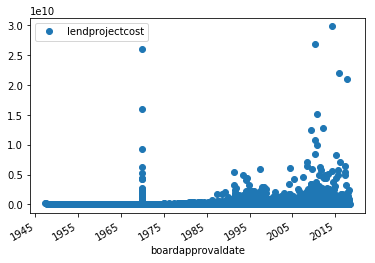

In [732]:
df_interest.plot(x = 'boardapprovaldate', y = 'lendprojectcost', style='o' )

In [742]:
df_interest['year'] = df_interest['boardapprovaldate'].map(lambda x: x.year)

In [755]:
gdp = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', header=2)
gdp.drop(['Unnamed: 62'], axis=1, inplace=True)
gdp['2018'] = None
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,None
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,NaN,None
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,None
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,None
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,None
5,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.795805e+12,2.109668e+12,2.501554e+12,2.741239e+12,2.839627e+12,2.906616e+12,2.563302e+12,2.504703e+12,NaN,None
6,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.535474e+11,2.898804e+11,3.509084e+11,3.748180e+11,3.904273e+11,4.031977e+11,3.579492e+11,3.487433e+11,NaN,None
7,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,3.329765e+11,4.236274e+11,5.301633e+11,5.459824e+11,5.520251e+11,5.263197e+11,5.847115e+11,5.454761e+11,NaN,None
8,Armenia,ARM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.647937e+09,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.057230e+10,NaN,None
9,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08,NaN,None


In [756]:
gdp = gdp[~gdp['Country Name'].isin(ignore_countries)]
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,None
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,NaN,None
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,None
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,None
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,None
6,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.535474e+11,2.898804e+11,3.509084e+11,3.748180e+11,3.904273e+11,4.031977e+11,3.579492e+11,3.487433e+11,NaN,None
7,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,3.329765e+11,4.236274e+11,5.301633e+11,5.459824e+11,5.520251e+11,5.263197e+11,5.847115e+11,5.454761e+11,NaN,None
8,Armenia,ARM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.647937e+09,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.057230e+10,NaN,None
9,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08,NaN,None
10,Antigua and Barbuda,ATG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.224253e+09,1.152469e+09,1.142043e+09,1.211412e+09,1.192925e+09,1.280133e+09,1.364863e+09,1.460145e+09,NaN,None


In [757]:
gdp = gdp.fillna(method='bfill', axis=1)
gdp = gdp.fillna(method='ffill', axis=1)
gdp = gdp.reindex()
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.33017e+09,1.33017e+09,1.33017e+09,1.33017e+09,1.33017e+09,1.33017e+09,...,2.49893e+09,2.4677e+09,2.58446e+09,2.58446e+09,2.58446e+09,2.58446e+09,2.58446e+09,2.58446e+09,2.58446e+09,2.58446e+09
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.37778e+08,5.48889e+08,5.46667e+08,7.51111e+08,8e+08,1.00667e+09,...,1.24869e+10,1.59368e+10,1.79302e+10,2.05365e+10,2.02643e+10,2.06161e+10,1.92156e+10,1.9469e+10,1.9469e+10,1.9469e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,6.68449e+09,6.68449e+09,6.68449e+09,6.68449e+09,6.68449e+09,6.68449e+09,...,7.54924e+10,8.24709e+10,1.04116e+11,1.15398e+11,1.24912e+11,1.26777e+11,1.02962e+11,9.53351e+10,9.53351e+10,9.53351e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1.92424e+09,1.92424e+09,1.92424e+09,1.92424e+09,1.92424e+09,1.92424e+09,...,1.20442e+10,1.1927e+10,1.28909e+10,1.23198e+10,1.27763e+10,1.32282e+10,1.13353e+10,1.18639e+10,1.18639e+10,1.18639e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,7.86192e+07,7.86192e+07,7.86192e+07,7.86192e+07,7.86192e+07,7.86192e+07,...,3.66053e+09,3.3557e+09,3.44206e+09,3.16462e+09,3.28159e+09,3.35074e+09,2.81149e+09,2.85852e+09,2.85852e+09,2.85852e+09
6,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,1.47207e+10,1.47207e+10,1.47207e+10,1.47207e+10,1.47207e+10,1.47207e+10,...,2.53547e+11,2.8988e+11,3.50908e+11,3.74818e+11,3.90427e+11,4.03198e+11,3.57949e+11,3.48743e+11,3.48743e+11,3.48743e+11
7,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,2.44506e+10,2.44506e+10,2.44506e+10,1.82721e+10,2.56052e+10,2.83447e+10,...,3.32976e+11,4.23627e+11,5.30163e+11,5.45982e+11,5.52025e+11,5.2632e+11,5.84711e+11,5.45476e+11,5.45476e+11,5.45476e+11
8,Armenia,ARM,GDP (current US$),NY.GDP.MKTP.CD,2.25684e+09,2.25684e+09,2.25684e+09,2.25684e+09,2.25684e+09,2.25684e+09,...,8.64794e+09,9.26028e+09,1.01421e+10,1.06193e+10,1.11215e+10,1.16095e+10,1.05533e+10,1.05723e+10,1.05723e+10,1.05723e+10
9,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,5.14e+08,5.14e+08,5.14e+08,5.14e+08,5.14e+08,5.14e+08,...,6.78e+08,5.76e+08,5.74e+08,6.44e+08,6.41e+08,6.43e+08,6.59e+08,6.58e+08,6.58e+08,6.58e+08
10,Antigua and Barbuda,ATG,GDP (current US$),NY.GDP.MKTP.CD,7.74967e+07,7.74967e+07,7.74967e+07,7.74967e+07,7.74967e+07,7.74967e+07,...,1.22425e+09,1.15247e+09,1.14204e+09,1.21141e+09,1.19293e+09,1.28013e+09,1.36486e+09,1.46014e+09,1.46014e+09,1.46014e+09


In [758]:
gdp = gdp.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name ='year', value_name='gdp')
gdp = gdp[gdp['gdp'] != 'NY.GDP.MKTP.CD']

In [760]:
gdp['year'] = pd.to_numeric(gdp['year'])
gdp['gdp'] = pd.to_numeric(gdp['gdp'])
gdp = gdp[['Country Name', 'year', 'gdp']]

In [761]:
df_final = df_interest.merge(gdp, how='left', left_on=['indicator_country_name', 'year'], right_on=['Country Name', 'year'])

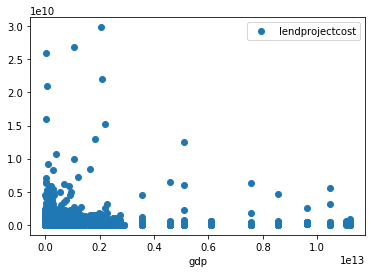

In [762]:
df_final.plot(x='gdp', y='lendprojectcost', style='o')

In [763]:
df_final.gdp.head()

0    2.052762e+11
1    3.102483e+08
2    2.789134e+11
3    3.829985e+10
4    2.113198e+10
Name: gdp, dtype: float64

# Another Indicator

In [764]:
df_final.head()

,id,countryname,indicator_country_name,project_name,boardapprovaldate,lendprojectcost,year,Country Name,gdp
0,P160543,Socialist Republic of Vietnam,Vietnam,Quality Deaf Education in Vietnam,2018-05-31,3000000.0,2018,Vietnam,2.052762e+11
1,P160504,Republic of Palau,Palau,Palau: ICT Sector Technical Assistance,2018-03-30,1550000.0,2018,Palau,3.102483e+08
2,P165684,Islamic Republic of Pakistan,Pakistan,Digital Jobs in Khyber Pakhtunkhwa,2018-03-23,2200000.0,2018,Pakistan,2.789134e+11
3,P156837,Republic of Serbia,Serbia,State Owned Financial Institutions Reform Project,2018-03-20,56000000.0,2018,Serbia,3.829985e+10
4,P160792,Nepal,Nepal,Nepal Fiscal Reforms DPC,2018-03-20,200000000.0,2018,Nepal,2.113198e+10


In [777]:
pop = pd.read_csv('data/API_SP.POP.TOTL_DS2_en_csv_v2/API_SP.POP.TOTL_DS2_en_csv_v2.csv', header=2)
pop.drop(['Unnamed: 62'], axis=1, inplace=True)
pop['2018'] = None
pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Population, total",SP.POP.TOTL,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,...,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,NaN,None
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,NaN,None
2,Angola,AGO,"Population, total",SP.POP.TOTL,5.643182e+06,5.753024e+06,5.866061e+06,5.980417e+06,6.093321e+06,6.203299e+06,...,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07,NaN,None
3,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,NaN,None
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,NaN,None
5,Arab World,ARB,"Population, total",SP.POP.TOTL,9.249093e+07,9.504450e+07,9.768229e+07,1.004111e+08,1.032399e+08,1.061750e+08,...,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,NaN,None
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,9.263400e+04,1.010780e+05,1.124720e+05,1.255660e+05,1.385290e+05,1.503620e+05,...,7.666393e+06,8.270684e+06,8.672475e+06,8.900453e+06,9.006263e+06,9.070867e+06,9.154302e+06,9.269612e+06,NaN,None
7,Argentina,ARG,"Population, total",SP.POP.TOTL,2.061908e+07,2.095308e+07,2.128768e+07,2.162184e+07,2.195393e+07,2.228339e+07,...,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07,NaN,None
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1.874120e+06,1.941491e+06,2.009526e+06,2.077575e+06,2.144998e+06,2.211316e+06,...,2.888584e+06,2.877311e+06,2.875581e+06,2.881922e+06,2.893509e+06,2.906220e+06,2.916950e+06,2.924816e+06,NaN,None
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,NaN,None


In [778]:
pop = pop[~pop['Country Name'].isin(ignore_countries)].reindex() # gets rid of huge outliers because they are not country names

pop = pop.fillna(method='bfill', axis=1)
pop = pop.fillna(method='ffill', axis=1)

In [779]:
pop = pop.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name ='year', value_name='population')

In [782]:
pop['year'] = pd.to_numeric(pop['year'])
pop = pop[['Country Name', 'year', 'population']]

In [783]:
df_final = df_final.merge(pop, how='left', left_on=['indicator_country_name', 'year'], right_on=['Country Name', 'year'])

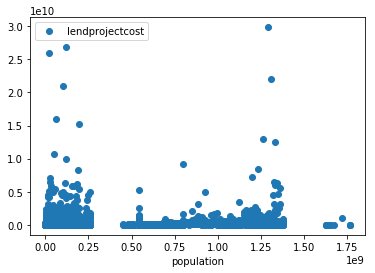

In [784]:
df_final.plot(x='population', y='lendprojectcost', style='o')

In [785]:
df_final[df_final.lendprojectcost > 2.5*10**10]

,id,countryname,indicator_country_name,project_name,boardapprovaldate,lendprojectcost,year,Country Name_x,gdp,Country Name_y,population
1735,P144447,Republic of India,India,India: Elementary Education III,2014-05-16,2.983330e+10,2014,India,2.035393e+12,India,1.293859e+09
3897,P116226,United Mexican States,Mexico,Support to the Social Protection System in Health,2010-03-25,2.686100e+10,2010,Mexico,1.051129e+12,Mexico,1.173189e+08
16182,P165178,Argentine Republic,Argentina,Capital Market; Infrastructure Bond Liquidity ...,1969-12-23,2.600113e+10,1969,Argentina,3.125628e+10,Argentina,2.360599e+07


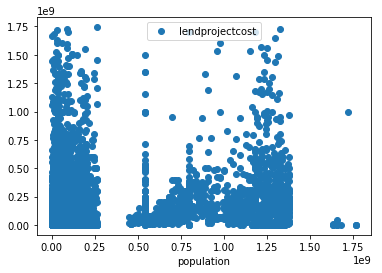

In [786]:
df_final[df_final.lendprojectcost < .5*9**10].plot(x='population', y='lendprojectcost', style='o')

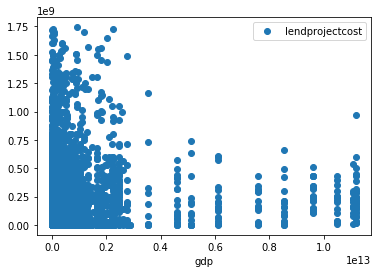

In [787]:
df_final[df_final.lendprojectcost < .5*9**10].plot(x='gdp', y='lendprojectcost', style='o')

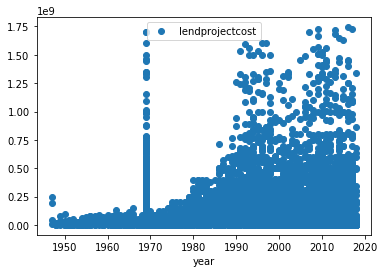

In [788]:
df_final[df_final.lendprojectcost < .5*9**10].plot(x='year', y='lendprojectcost', style='o')

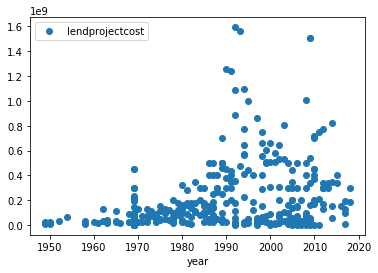

In [789]:
df_final[((df_final.lendprojectcost < .5*9**10) & (df_final.indicator_country_name == 'Mexico' ))].plot(x='year', y='lendprojectcost', style='o')

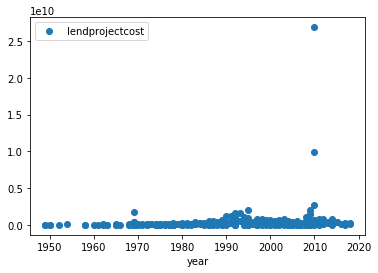

In [790]:
df_final[((df_final.indicator_country_name == 'Mexico' ))].plot(x='year', y='lendprojectcost', style='o')

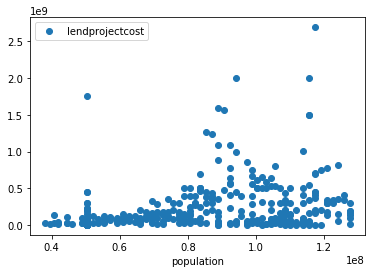

In [791]:
df_final[(df_final.indicator_country_name == 'Mexico' ) & (df_final.lendprojectcost < .5*10**10)].plot(x='population', y='lendprojectcost', style='o')

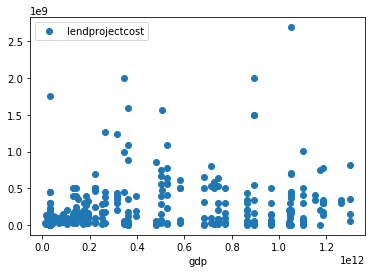

In [792]:
df_final[(df_final.indicator_country_name == 'Mexico' ) & (df_final.lendprojectcost < .5*10**10)].plot(x='gdp', y='lendprojectcost', style='o')

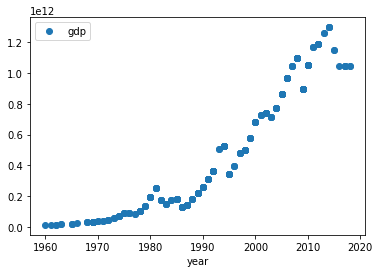

In [793]:
df_final[(df_final.indicator_country_name == 'Mexico' ) & (df_final.lendprojectcost < .5*10**10)].plot(x='year', y='gdp', style='o')

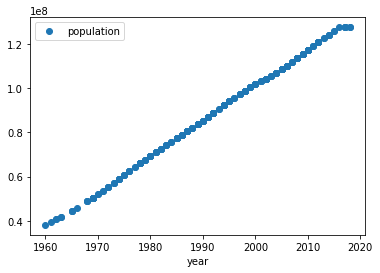

In [794]:
df_final[(df_final.indicator_country_name == 'Mexico' ) & (df_final.lendprojectcost < .5*10**10)].plot(x='year', y='population', style='o')

In [795]:
df_final.population = pd.to_numeric(df_final.population)
df_final.gdp = pd.to_numeric(df_final.gdp)

df_final = df_final.rename(columns = { 'gdp' : 'grossdomesticproduct'})

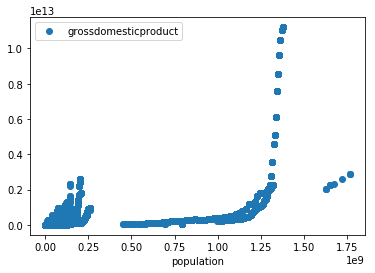

In [796]:
df_final.plot(x='population', y='grossdomesticproduct', style='o')

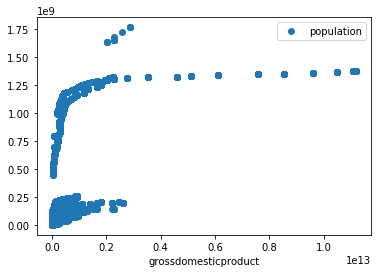

In [797]:
df_final.plot(x='grossdomesticproduct', y='population', style='o')

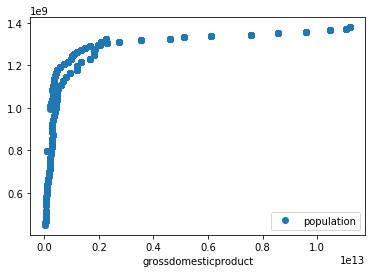

In [805]:
df_final[(df_final['indicator_country_name'] == 'India') | (df_final['indicator_country_name'] == 'China')].plot(x='grossdomesticproduct', y='population', style='o')

In [808]:
df_final[df_final['indicator_country_name'] == 'China']

,id,countryname,indicator_country_name,project_name,boardapprovaldate,lendprojectcost,year,Country Name_x,grossdomesticproduct,Country Name_y,population
83,P147009,People's Republic of China,China,Jiangxi Farm Produce Distribution System Devel...,2017-12-15,1.982800e+08,2017,China,1.119915e+13,China,1.378665e+09
138,P154621,People's Republic of China,China,China: Guangdong Compulsory Education Project,2017-10-31,2.794000e+08,2017,China,1.119915e+13,China,1.378665e+09
187,P153115,People's Republic of China,China,Hunan Integrated Management of Agricultural La...,2017-08-22,1.119400e+08,2017,China,1.119915e+13,China,1.378665e+09
206,P156507,People's Republic of China,China,GEF China Sustainable Cities Integrated Approa...,2017-07-27,3.273000e+07,2017,China,1.119915e+13,China,1.378665e+09
232,P153473,People's Republic of China,China,Three Gorges Modern Logistics Center Infrastru...,2017-06-30,4.460000e+08,2017,China,1.119915e+13,China,1.378665e+09
353,P154984,People's Republic of China,China,China Health Reform Program,2017-05-09,6.000000e+08,2017,China,1.119915e+13,China,1.378665e+09
416,P152959,People's Republic of China,China,Reduction and Phaseout of PFOS in Priority Sec...,2017-04-07,6.722000e+07,2017,China,1.119915e+13,China,1.378665e+09
424,P154623,People's Republic of China,China,China: Gansu Technical and Vocational Educatio...,2017-03-31,1.445200e+08,2017,China,1.119915e+13,China,1.378665e+09
470,P132748,People's Republic of China,China,Developing Market-based Energy Efficiency Prog...,2017-03-16,1.780000e+07,2017,China,1.119915e+13,China,1.378665e+09
471,P153604,People's Republic of China,China,Poyang Lake Basin Town Water Environment Manag...,2017-03-16,2.199300e+08,2017,China,1.119915e+13,China,1.378665e+09
